In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
import joblib
import pickle

In [ ]:
# Load dataset
df = pd.read_excel("chess_updated.xlsx")

In [ ]:
# Define bot labeling using a median-based dynamic threshold
df["normalized_avg_move_time_white"] = df["avg_move_time_white"] / df["turns"]
df["normalized_avg_move_time_black"] = df["avg_move_time_black"] / df["turns"]
white_threshold = df["normalized_avg_move_time_white"].median() * 0.50
black_threshold = df["normalized_avg_move_time_black"].median() * 0.50

df["is_bot_white"] = df["normalized_avg_move_time_white"].apply(lambda x: 1 if x < white_threshold else 0)
df["is_bot_black"] = df["normalized_avg_move_time_black"].apply(lambda x: 1 if x < black_threshold else 0)

In [ ]:
# Prepare dataset for model training
expanded_data = []
for _, row in df.iterrows():
    # White player
    white_data = {
        "avg_move_time": row["normalized_avg_move_time_white"],
        "rating": row["white_rating"],
        "turns": row["turns"],
        "is_bot": row["is_bot_white"],
    }
    expanded_data.append(white_data)

    # Black player
    black_data = {
        "avg_move_time": row["normalized_avg_move_time_black"],
        "rating": row["black_rating"],
        "turns": row["turns"],
        "is_bot": row["is_bot_black"],
    }
    expanded_data.append(black_data)

expanded_df = pd.DataFrame(expanded_data)

In [ ]:
# Features and labels for Model 1 (original model)
X1 = expanded_df[["avg_move_time", "rating"]]
y1 = expanded_df["is_bot"]

In [ ]:
# Split dataset for Model 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
y1_pred = model_1.predict(X1_test)

In [ ]:
# Train Model 1
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
model_1.fit(X1_train, y1_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Save models
with open("chess_bot_model_1.pkl", "wb") as model_file:
    pickle.dump(model_1, model_file)

In [ ]:
# Initialize and fit the scaler for Model 1
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [ ]:
# Save the trained scaler
joblib.dump(scaler, "scaler.pkl")

print("Models and scaler saved successfully!")

Models and scaler saved successfully!


In [ ]:
# Example new game prediction
new_game_data = pd.DataFrame({
    "turns": [41],
    "white_rating": [1800],
    "black_rating": [1400],
    "avg_move_time_white": [2001],  # In milliseconds
    "avg_move_time_black": [6000],  # In milliseconds
})

In [ ]:
# Load models
model_1 = joblib.load("chess_bot_model_1.pkl")

In [ ]:
# Prediction logic
threshold_milliseconds = 3000  # Threshold for bots when turns < 45

# White player prediction
avg_move_time_white = new_game_data["avg_move_time_white"].values[0]  # Directly in milliseconds
rating_white = new_game_data["white_rating"].values[0]
turns = new_game_data["turns"].values[0]

if turns < 45:
    white_prediction = "Bot" if avg_move_time_white <= threshold_milliseconds else "Human"
else:
    normalized_move_time_white = avg_move_time_white / turns   # Convert to seconds per turn
    white_prediction = "Bot" if model_1.predict([[normalized_move_time_white, rating_white]])[0] == 1 else "Human"

# Black player prediction
avg_move_time_black = new_game_data["avg_move_time_black"].values[0]  # Directly in milliseconds
rating_black = new_game_data["black_rating"].values[0]

if turns < 45:
    black_prediction = "Bot" if avg_move_time_black < threshold_milliseconds else "Human"
else:
    normalized_move_time_black = avg_move_time_black / turns   # Convert to seconds per turn
    black_prediction = "Bot" if model_1.predict([[normalized_move_time_black, rating_black]])[0] == 1 else "Human"

In [ ]:
# Print results
print("White Player Prediction:", white_prediction)
print("Black Player Prediction:", black_prediction)

White Player Prediction: Bot
Black Player Prediction: Human


In [ ]:
print(f"Checking White: avg_move_time={avg_move_time_white}ms, threshold={threshold_milliseconds}ms")
print(f"Checking Black: avg_move_time={avg_move_time_black}ms, threshold={threshold_milliseconds}ms")

Checking White: avg_move_time=2001ms, threshold=3000ms
Checking Black: avg_move_time=6000ms, threshold=3000ms


DATA VIZUALISATION


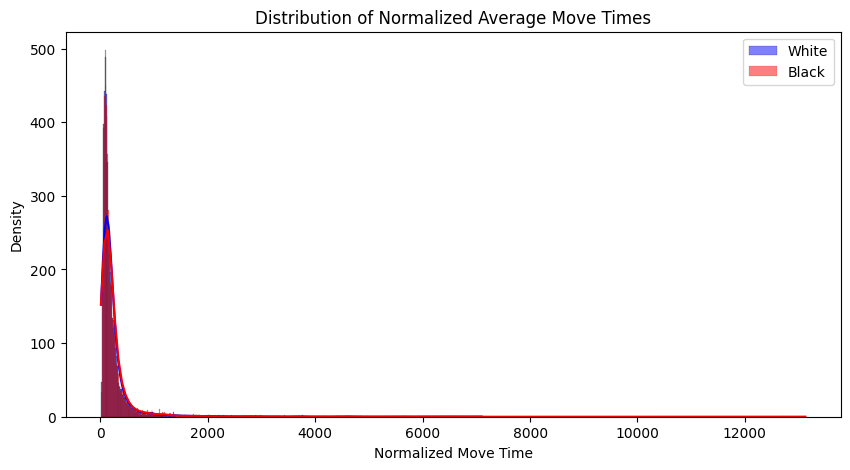

In [ ]:
# Visualization 1: Distribution of Move Times
plt.figure(figsize=(10,5))
sns.histplot(df["normalized_avg_move_time_white"], kde=True, color="blue", label="White")
sns.histplot(df["normalized_avg_move_time_black"], kde=True, color="red", label="Black")
plt.title("Distribution of Normalized Average Move Times")
plt.xlabel("Normalized Move Time")
plt.ylabel("Density")
plt.legend()
plt.show()

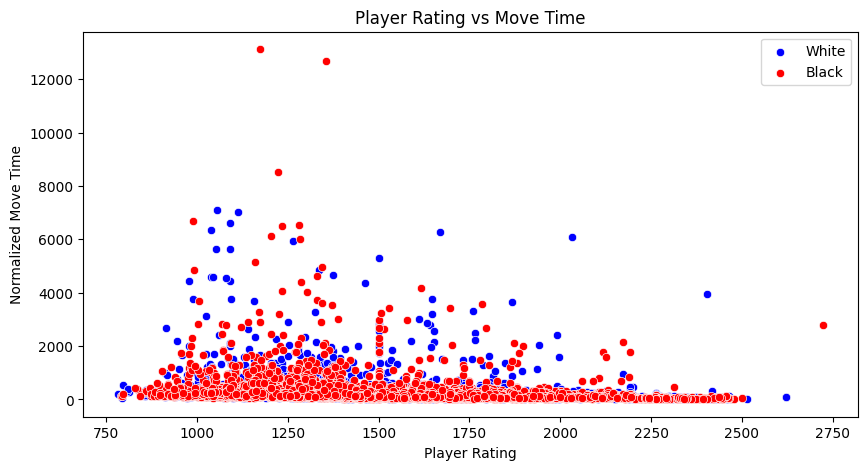

In [ ]:
# Visualization 2: Player Rating vs Move Time
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["white_rating"], y=df["normalized_avg_move_time_white"], color="blue", label="White")
sns.scatterplot(x=df["black_rating"], y=df["normalized_avg_move_time_black"], color="red", label="Black")
plt.title("Player Rating vs Move Time")
plt.xlabel("Player Rating")
plt.ylabel("Normalized Move Time")
plt.legend()
plt.show()

<ipython-input-46-91fdb353eb4c>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["is_bot_white"]==1]["normalized_avg_move_time_white"], color='blue', label='Bots', shade=True)
<ipython-input-46-91fdb353eb4c>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["is_bot_white"]==0]["normalized_avg_move_time_white"], color='green', label='Humans', shade=True)


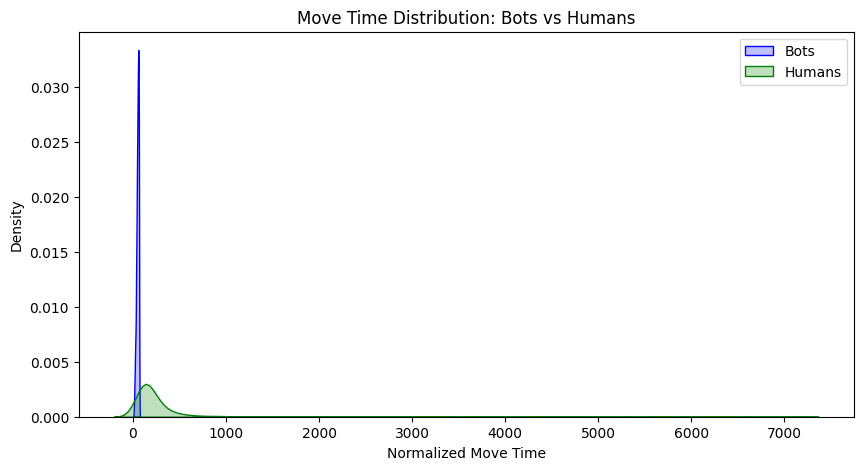

In [ ]:
# Visualization 3: Move Time Distribution for Bots vs Humans
plt.figure(figsize=(10,5))
sns.kdeplot(df[df["is_bot_white"]==1]["normalized_avg_move_time_white"], color='blue', label='Bots', shade=True)
sns.kdeplot(df[df["is_bot_white"]==0]["normalized_avg_move_time_white"], color='green', label='Humans', shade=True)
plt.title("Move Time Distribution: Bots vs Humans")
plt.xlabel("Normalized Move Time")
plt.ylabel("Density")
plt.legend()
plt.show()

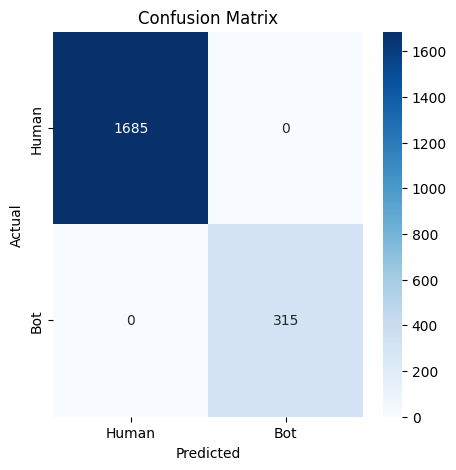

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Human", "Bot"], yticklabels=["Human", "Bot"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Model Metrics
accuracy = accuracy_score(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred)
report = classification_report(y1_test, y1_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print("Classification Report:\n", report)

Accuracy: 1.00
Mean Squared Error: 0.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1685
           1       1.00      1.00      1.00       315

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

